In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported.')
from sklearn.model_selection import train_test_split

Libraries imported.


In [2]:
df = pd.read_csv('data_processed.csv')
df.head()

,Type,Machine failure,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Air_temperature,Process_temperature,type_of_failure
0,1.0,0,0.222934,0.535714,0.000000,0.304348,0.358025,5
1,0.0,0,0.139697,0.583791,0.011858,0.315217,0.370370,5
2,0.0,0,0.192084,0.626374,0.019763,0.304348,0.345679,5
3,0.0,0,0.154249,0.490385,0.027668,0.315217,0.358025,5
4,0.0,0,0.139697,0.497253,0.035573,0.315217,0.370370,5


In [3]:
## separating train and test data

X = df.drop(['Machine failure','type_of_failure'],axis=1)
y = df['Machine failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Predicting the machine failure, if the machine will fail or not
We will be using 4 models here which are:
1. Logistic Regression
2. Support Vector Machine
3. Decision Tree Classifier
4. Random Forest Classifier

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

lr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = [lr, svc, dt, rf]
scores = []

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100
    rec = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    scores.append([acc, prec, rec, f1])

In [5]:
scores_df = pd.DataFrame(columns=['Model'], data=['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest'])
scores_df = pd.concat([scores_df, pd.DataFrame(scores, columns=['Accuracy', 'Precision', 'Recall', 'F1'])], axis=1)
scores_df

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,84.036951,86.526237,90.038911,88.247632
1,SVC,96.002763,94.939849,99.286641,97.064604
2,Decision Tree,99.015799,99.031758,99.494163,99.262422
3,Random Forest,99.222999,98.908858,99.935149,99.419355


In [6]:
best_model_idx = scores_df['F1'].idxmax()
best_model = scores_df.loc[best_model_idx, 'Model']
best_model

'Random Forest'

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0])

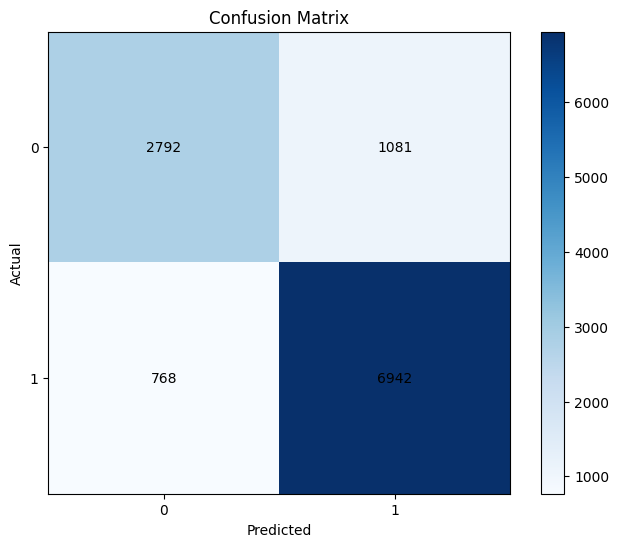

In [11]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Matplotlib's imshow
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(cm))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

In [9]:
# import joblib

# filename = "rf1.pkl"
# joblib.dump(rf,filename)

['rf1.pkl']

In [14]:
## Again separating the train test data
X = df.drop(['Machine failure', 'type_of_failure'], axis=1)
y = df['type_of_failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

lr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = [lr, svc, dt, rf]
scores = []

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred, average='macro') * 100
    rec = recall_score(y_test, y_pred, average='macro') * 100
    f1 = f1_score(y_test, y_pred, average='macro') * 100
    scores.append([acc, prec, rec, f1])

In [16]:
scores_df = pd.DataFrame(columns=['Model'], data=['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest'])
scores_df = pd.concat([scores_df, pd.DataFrame(scores, columns=['Accuracy', 'Precision', 'Recall', 'F1'])], axis=1)
scores_df

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,83.510317,82.796300,83.570031,83.036450
1,SVC,93.999827,94.194712,94.068074,93.799624
2,Decision Tree,98.670465,98.671481,98.682278,98.669766
3,Random Forest,99.188466,99.197828,99.199874,99.189103


In [17]:
rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([0, 4, 5, ..., 0, 3, 3])

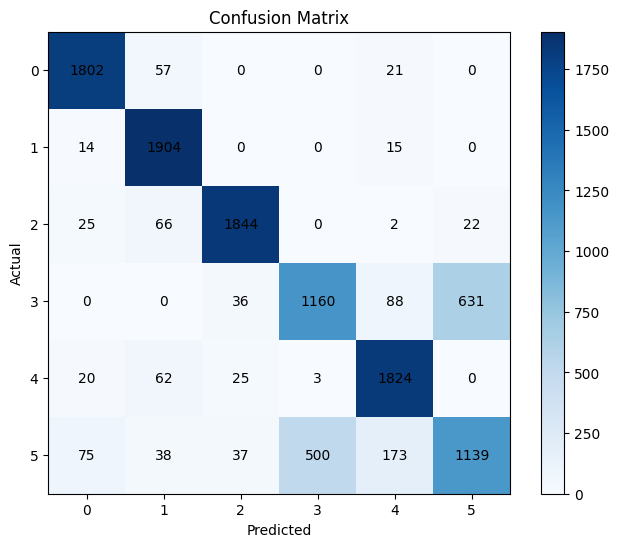

In [18]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Matplotlib's imshow
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(cm))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

In [17]:
import joblib

filename = "rf2.pkl"
joblib.dump(rf2,filename)

['rf2.pkl']